In [5]:
import pandas as pd
import seaborn as sns
import numpy as np


df = pd.read_csv("full_cleaned_data.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df

,Name,Street,Price Tags,Average Rating,Review text,Category 1,Category 2,Customer Satisfaction
0,THE FARMHOUSE TAP & GRILL,Bank_St,2.0,4.0,julie another wonderful experience farmhouse! ...,burgers,tradamerica,High
1,HEN OF THE WOOD,NaN,3.0,4.5,"cozy interior, fresh (we saw farmer drop stack...",newamerican,NaN,High
2,THE GRYPHON,Main_St,2.0,4.5,"best brunch. bloody mary' die for, love unique...",nightlife,newamerican,High
3,JUNIPER BAR & RESTAURANT,Cherry_St,2.0,4.0,met family crazy thanksgiving weekend. great p...,tradamerica,NaN,High
4,HONEY ROAD,Church_St,2.0,4.5,review mentioned difficult get reservation res...,NaN,NaN,High
...,...,...,...,...,...,...,...,...
105,KRU COFFEE,Church_St,1.0,4.5,stopped last day struggling decide grab coffee...,coffee,sandwiche,High
106,HALVORSON’S UPSTREET CAFE,Church_St,2.0,3.0,great food. cozy atmosphere. made reservations...,tradamerica,beer_and_wine,Low
107,PIESANOS,Main_St,2.0,3.0,"1 1/2 hour delivery wait...i get it, it' busy,...",pizza,italian,Low
108,KESTREL COFFEE ROASTERS,Maple_St,NaN,4.5,sweet little roastery free short term streetsi...,cafes,coffee,High


In [6]:
from scipy.stats import chi2_contingency

def chi_squared(contingency_table):
    # give contingency table in 2D array
    result = chi2_contingency(contingency_table)
    statistic = result[0]
    p_val = result[1]
    #note: if the p-val is greater than .05, variables are independent
    return statistic, p_val

In [7]:
#Since pval=0.465, Customer Satisfaction and Street have no relationship - independent
table = pd.crosstab(df["Customer Satisfaction"], df["Street"])
stat, p = chi_squared(table)

#p-val =.22 - no relationship 
table = pd.crosstab(df["Customer Satisfaction"], df["Price Tags"])
stat, p = chi_squared(table)

#p-val =0.455 - no relationship
table = pd.crosstab(df["Customer Satisfaction"], df["Review text"])
stat, p = chi_squared(table)

#p-val =0.07166 - no relationship (BUT SO CLOSE, maybe depends on alpha level)
table = pd.crosstab(df["Customer Satisfaction"], df["Category 1"])
stat, p = chi_squared(table)

#p-val =0.639 - no relationship
table = pd.crosstab(df["Customer Satisfaction"], df["Category 2"])
stat, p = chi_squared(table)

#p-val =0.00404 - THERE SEEMS TO BE EVIDENCE OF A RELATIONSHIP**
table = pd.crosstab(df["Category 1"], df["Price Tags"])
stat, p = chi_squared(table)




In [44]:
df = df.replace('sush','sushi')
df = df.replace('tradamerica','traditional American')
df = df.replace('breakfast_brunch','breakfast & brunch')
df = df.replace('vegetaria','vegetarian')
df = df.replace('tha','thai')
df = df.replace('seafoo','seafood')
df = df.replace('sala','salad')
df = df.replace('newamerican','new American')
df = df.replace('chinese','Chinese')
df = df.replace('indpak','Indian')
df = df.replace('sandwiche', 'sandwiches')
df = df.replace('italian','Italian')
df = df.replace('himalayan','Himalayan')
df = df.replace('mexican', 'Mexican')

In [45]:
df

,Name,Street,Price Tags,Average Rating,Review text,Category 1,Category 2,Customer Satisfaction
0,THE FARMHOUSE TAP & GRILL,Bank_St,2.0,4.0,julie another wonderful experience farmhouse! ...,burgers,traditional American,High
1,HEN OF THE WOOD,NaN,3.0,4.5,"cozy interior, fresh (we saw farmer drop stack...",new American,NaN,High
2,THE GRYPHON,Main_St,2.0,4.5,"best brunch. bloody mary' die for, love unique...",nightlife,new American,High
3,JUNIPER BAR & RESTAURANT,Cherry_St,2.0,4.0,met family crazy thanksgiving weekend. great p...,traditional American,NaN,High
4,HONEY ROAD,Church_St,2.0,4.5,review mentioned difficult get reservation res...,NaN,NaN,High
...,...,...,...,...,...,...,...,...
105,KRU COFFEE,Church_St,1.0,4.5,stopped last day struggling decide grab coffee...,coffee,sandwiches,High
106,HALVORSON’S UPSTREET CAFE,Church_St,2.0,3.0,great food. cozy atmosphere. made reservations...,traditional American,beer_and_wine,Low
107,PIESANOS,Main_St,2.0,3.0,"1 1/2 hour delivery wait...i get it, it' busy,...",pizza,Italian,Low
108,KESTREL COFFEE ROASTERS,Maple_St,NaN,4.5,sweet little roastery free short term streetsi...,cafes,coffee,High


TypeError: 'value' must be an instance of str or bytes, not a float

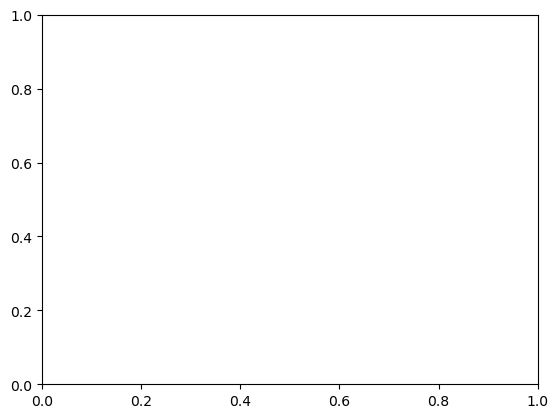

In [56]:
plt.bar('Category 1', 'Average Rating', data=df)
plt.xticks(rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'burgers'),
  Text(1, 0, 'new American'),
  Text(2, 0, 'nightlife'),
  Text(3, 0, 'traditional American'),
  Text(4, 0, 'breakfast & brunch'),
  Text(5, 0, 'vegetarian'),
  Text(6, 0, 'Indian'),
  Text(7, 0, 'pizza'),
  Text(8, 0, 'Italian'),
  Text(9, 0, 'thai'),
  Text(10, 0, 'cafes'),
  Text(11, 0, 'sushi'),
  Text(12, 0, 'sandwiches'),
  Text(13, 0, 'seafood'),
  Text(14, 0, 'delis'),
  Text(15, 0, 'coffee'),
  Text(16, 0, 'foodstands'),
  Text(17, 0, 'cocktailbars'),
  Text(18, 0, 'Himalayan'),
  Text(19, 0, 'noodles'),
  Text(20, 0, 'mexican'),
  Text(21, 0, 'juicebars'),
  Text(22, 0, 'salad'),
  Text(23, 0, 'Chinese')])

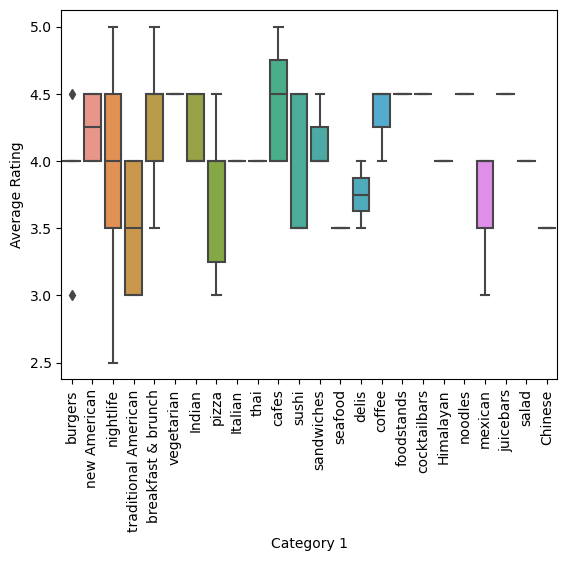

In [42]:
import seaborn as sns
import matplotlib.pylab as plt

sns.boxplot(x='Category 1', y='Average Rating', data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'burgers'),
  Text(1, 0, 'new American'),
  Text(2, 0, 'nightlife'),
  Text(3, 0, 'traditional American'),
  Text(4, 0, 'breakfast & brunch'),
  Text(5, 0, 'vegetarian'),
  Text(6, 0, 'Indian'),
  Text(7, 0, 'pizza'),
  Text(8, 0, 'Italian'),
  Text(9, 0, 'thai'),
  Text(10, 0, 'cafes'),
  Text(11, 0, 'sushi'),
  Text(12, 0, 'sandwiches'),
  Text(13, 0, 'seafood'),
  Text(14, 0, 'delis'),
  Text(15, 0, 'coffee'),
  Text(16, 0, 'foodstands'),
  Text(17, 0, 'cocktailbars'),
  Text(18, 0, 'Himalayan'),
  Text(19, 0, 'noodles'),
  Text(20, 0, 'mexican'),
  Text(21, 0, 'juicebars'),
  Text(22, 0, 'salad'),
  Text(23, 0, 'Chinese')])

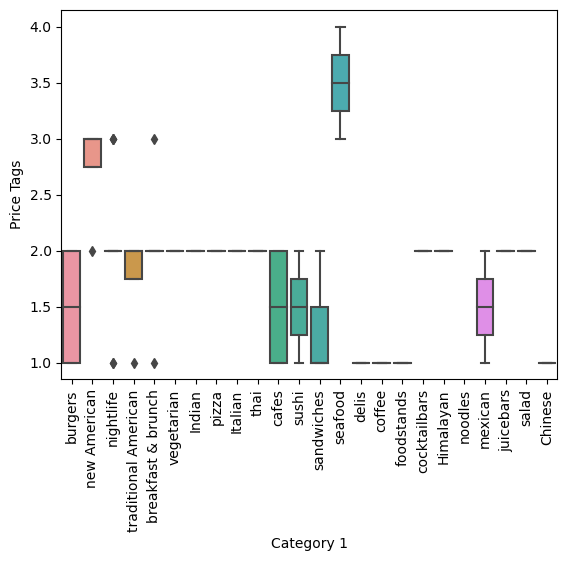

In [43]:
sns.boxplot(x='Category 1', y='Price Tags', data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Bank_St'),
  Text(1, 0, 'Main_St'),
  Text(2, 0, 'Cherry_St'),
  Text(3, 0, 'Church_St'),
  Text(4, 0, 'S_Champlain_St'),
  Text(5, 0, 'Lake_St'),
  Text(6, 0, 'Center_St'),
  Text(7, 0, 'Saint_Paul_St'),
  Text(8, 0, 'Pine_St'),
  Text(9, 0, 'N_Winooski_Ave'),
  Text(10, 0, 'North_Ave'),
  Text(11, 0, 'Riverside_Ave'),
  Text(12, 0, 'North_St'),
  Text(13, 0, 'Battery_St'),
  Text(14, 0, 'Mechanics_Ln'),
  Text(15, 0, 'N_St'),
  Text(16, 0, 'South_Union_St'),
  Text(17, 0, 'Pearl_St'),
  Text(18, 0, 'College_St'),
  Text(19, 0, 'Henry_St'),
  Text(20, 0, 'Shelburne_Rd'),
  Text(21, 0, 'Institute_Rd'),
  Text(22, 0, 'Oak_St'),
  Text(23, 0, 'S_Union_St'),
  Text(24, 0, 'N_Ave'),
  Text(25, 0, 'Tracy_Dr'),
  Text(26, 0, 'Flynn_Ave'),
  Text(27, 0, 'Lawson_Ln'),
  Text(28, 0, 'Colchester_Ave'),
  Text(29, 0, 'Maple_St'),
  Text(30, 0,

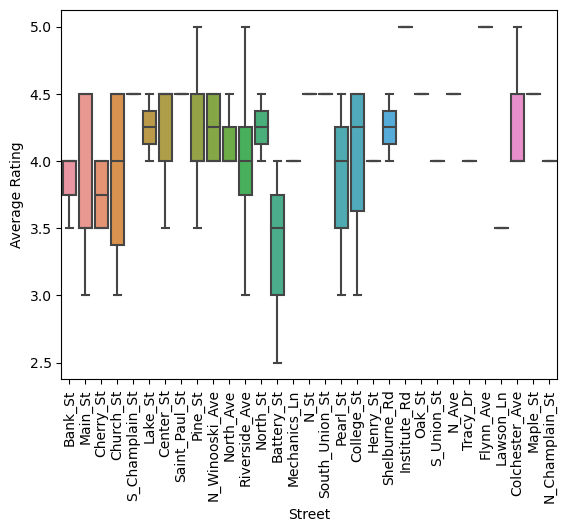

In [33]:
sns.boxplot(x='Street', y='Average Rating', data=df)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Average Rating', ylabel='Count'>

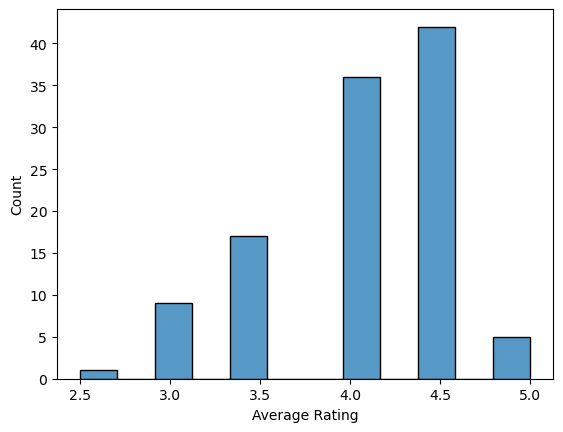

In [48]:
sns.histplot(data=df, x="Average Rating")